# Multivariate linear regression

Watch [Linear regression with multiple variables: multiple features](https://www.youtube.com/watch?v=o-Z787CP_9I) (8 min). Check that you’ve understood and remembered the following statements:
* multiple features
* $i$: denotes the training sample; $j$: denotes which feature
* Who spotted the small error on minute 7:26-7:32 in the video?

Watch [Linear regression with multiple variables: gradient descent for multiple variables](https://www.youtube.com/watch?v=OHtPSvODdcI) (5 min). Check that you’ve understood and remembered the following statements:
* by definition: $x_0(i) = 1$, for every sample $i$

Watch [Linear regression with multiple variables: feature scaling](https://www.youtube.com/watch?v=Nth_93UkcjI) (8 min). Check that you’ve understood and remembered the following statements:
* feature scaling: faster convergence
* all features >= -1 and <= 1
* mean normalization: all features have a mean of about 0. So the first sample $X_1$ is normalized by performing $(x_1 – \mu_1) / std_1$

Watch [Linear regression with multiple variables: learning rate](https://www.youtube.com/watch?v=RD7koxa4n4Q) (8 min). Check that you’ve understood and remembered the following statements:
* plot $J_\Theta$ as a function of #iterations, while gradient descent is running, to see how convergence is going
* automatic convergence test: definition convergence: $J_\Theta$ decreases by less than 10^-3 in one iteration (better to look at the plot)
* Reasons for gradient descent not working:
  * no convergence: learning rate $\alpha$ too big
  * slow convergence: learning rate $\alpha$ is too small (but can also $\alpha$ too big)
* Best practice: start with slow learning rate and every time increase it by factor of 3; find one value which is too small and one value which is too big

Watch [Linear regression with multiple variables: features and polynomial regression](https://www.youtube.com/watch?v=jmDI5YXr8Jk) (7 min). Check that you’ve understood and remembered the following statements:
* Model selection:
  * create your own derived features, based on domain knowledge (e.g. one feature parcel surface instead of two features parcel width and parcel length)
  * polynomial regression: use the square or cube of a feature
  <img src="polynomialRegression.png" />
* Note that polynomial regression is linear regression of a non-linear function


# Hands-on 2: Multivariate linear regression using Python/Numpy

In this hands-on, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. 

The file [ex1data2.txt](https://bitbucket.org/ercoargante/machinelearningcoursera/raw/3e715b8f5577e4f364dfd377e593d874a85d8d83/ex1/ex1data2.txt) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Save the file to the folder where thisJupyter notebook resides.

Based on the code of the previous hands-on, perform a multivariate linear regression (no polynomials!). Note that because the input consists of two variables, you need to perform feature normalization. Appreciate how little you need to adapt the previously created code to realize multivariate linear regression!

The following code is a copy of the previous hands-on containing the definitions of $h_\Theta(x)$, $J(\Theta)$ and the "gradient descent" learning algorithm. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# hypothesis (also called model)
def h(X, theta):  # this is the way to define a function in python
    return X.dot(theta)

In [9]:
# cost function
def J(X, y, theta):
    m = len(y)
    hyp = h(X, theta)  # shape of hyp is (97,1)
    square_err = (hyp - y)**2
    return 1/(2 * m) * np.sum(square_err)

In [10]:
# gradient
def grad(X, y, theta):
    hyp = h(X, theta)
    return 1/m * X.transpose().dot(hyp - y) # simultaneous update

In [11]:
# learning algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for _ in range(num_iters):
        theta -= alpha * grad(X, y, theta)
        J_history.append(J(X, y, theta))  # to allow displaying cost as a function of #iters
    return theta, J_history

**Exercise**: read the data set. In order to do this, look at the code of the previous hands-on. The difference is that this dataset has *two* features instead of one. Use python array slicing for this. Some examples:
* ```[:, 0:2]``` denotes the first two columns, so column 0 and column 1
* ```[:, 2]``` denotes the third column


**Exercise**: the first feature is the size of the house in square feet. Create a scatter plot of "the house prices against the size of house".

**Exercise**: the second feature is the number of bedrooms of the house. Create a scatter plot of "the house prices against the number of bedrooms".

**Exercise**: perform feature normalization. What needs to be done is to subtract the mean of every feature value, as this will center the value around zero. Secondly, by dividing through the standard deviation, all features will be in the same range. As we've seen already, in python it's preferred to not use for-loops, but to use a vectorized implementation. This gives clean, short code, and execution is much faster. The code to perform the feature normalization is ```X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)```. Please, take a moment to understand this code:
* every row of the matrix X is a sample, where the 1st element is the 1st feature, the 2nd element the 2nd feature, ...
* we want to take the mean of a sample, so the mean of a row; the ```axis=0``` takes care that the mean is taken of a row and not of a column
* in the same way the feature values are divided by the standard deviation

It's also important to note that when the model is trained and ready to use for prediction, input used for prediction must be feature-normalized as well! This is easy to forget. Secondly, feature normalization must be done using mean and standard deviation of <u>the original training set</u>.

The following code prepares the dataset by adding a column for $\Theta_0$ and transforming $y$ from a vector to a matrix, just in the same way as the previous hands-on:
```
# prepare the training set
ones = np.ones((m, 1))
X = np.hstack((ones, X))  # add X_0 after feature normalization, because X_0 has an std of 0
y = y[:, np.newaxis]  # don't need to do this to X, as X is already a matrix
```

Let's test the cost function to be verify the correct implementation up till now:
```
# test the cost function
theta = np.zeros([3, 1])
print("cost function: " + str(J(X, y, theta)))  # should give 65591548106.45744
np.testing.assert_array_almost_equal_nulp(J(X, y, theta), 65591548106.45744)
```

**Exercise**: perform the learning in the same way as the previous hands-on, using ```num_iters=400``` and ```alpha=0.01```.

**Exercise**: plot the cost function as a function of #iterations, using J_history, in the same way as the previous hands-on.

**Exercise**: verify that the cost is 2105448288.6292474, when passing ```X``` and ```y```, using the trained value of $\Theta$.

**Exercise**: use the result of learning to predict the house price for a house size of 1650 and 3 bedrooms. Don't forget to perform feature normalization and to add a ```1``` at the front of ```X``` to cater for $\Theta_0$. The result should be 289221.547371218097 dollar.

# The solution of hands-on 2

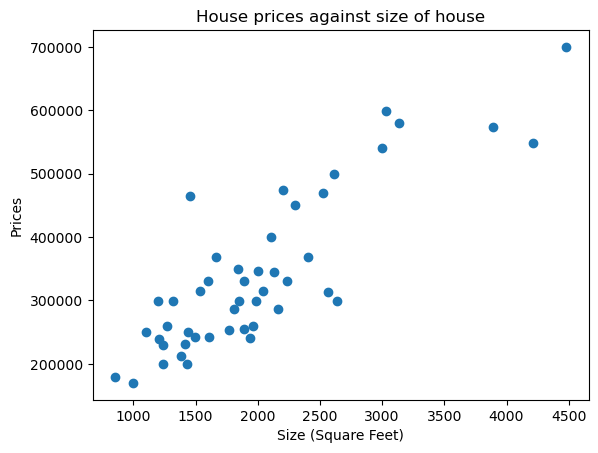

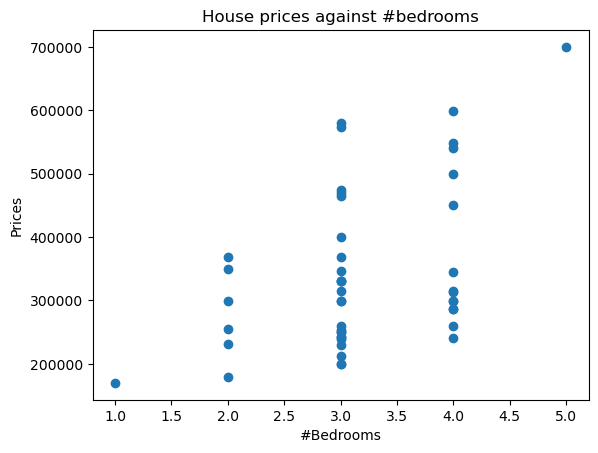

cost function: 65591548106.45744
theta: [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


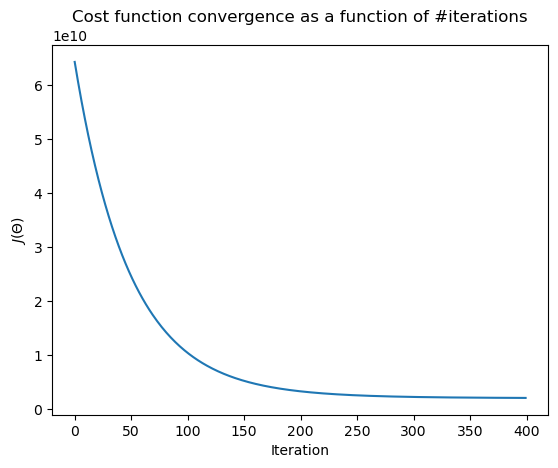

cost function: 2105448288.6292474
For size of house = 1650, #bedrooms = 3, we predict a house value of [289221.54737122] dollar


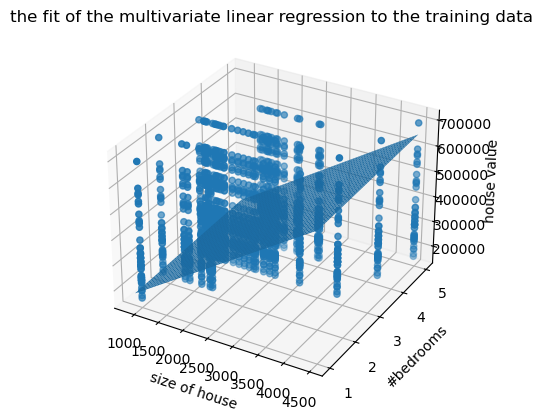

In [12]:
# Multivariate linear regression. It is nice to see that the previously 
# defined functions for cost and gradient descent can be reused without modification

############################### previously defined functions for cost and gradient descent ###############################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# hypothesis (also called model)
def h(X, theta):  # this is the way to define a function in python
    return X.dot(theta)

# cost function
def J(X, y, theta):
    m = len(y)
    hyp = h(X, theta)  # shape of hyp is (97,1)
    square_err = (hyp - y)**2
    return 1/(2 * m) * np.sum(square_err)

# gradient
def grad(X, y, theta):
    hyp = h(X, theta)
    return 1/m * X.transpose().dot(hyp - y) # simultaneous update

# learning algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for _ in range(num_iters):
        theta -= alpha * grad(X, y, theta)
        J_history.append(J(X, y, theta))  # to allow displaying cost as a function of #iters
    return theta, J_history


############################### solution of exercises ###############################

# read the training set
data = pd.read_csv('ex1data2.txt', sep=',', header=None)
data.head()  # view first few rows of the data
X = data.iloc[:, 0:2]  # read first two columns into X; in from:to the to is not included
y = data.iloc[:, 2]  # read the third column into y
m = len(y)  # number of training samples

# visualize the training set
plt.scatter(X.iloc[:,0], y)
plt.xlabel('Size (Square Feet)')
plt.ylabel('Prices')
plt.title("House prices against size of house")
plt.show()
plt.scatter(X.iloc[:,1], y)
plt.xlabel('#Bedrooms')
plt.ylabel('Prices')
plt.title("House prices against #bedrooms")
plt.show()

# feature normalization
# needed because X has multiple features
# every feature must be normalized separately
# feature normalization must be done *before* adding the column with ones, because std of ones is 0, leading to division by zero
def featureNormalize(Xin):
    return (Xin - np.mean(X, axis=0)) / np.std(X, axis=0)
Xn = featureNormalize(X)

# prepare the training set
ones = np.ones((m, 1))
Xn = np.hstack((ones, Xn))  # add X_0 after feature normalization, because X_0 has an std of 0
y = y.to_numpy()[:, np.newaxis]  # don't need to do this to X, as X is already a matrix

# test the cost function
theta = np.zeros([3, 1])
print("cost function: " + str(J(Xn, y, theta)))  # should give 65591548106.45744
np.testing.assert_array_almost_equal_nulp(J(Xn, y, theta), 65591548106.45744)

# perform learning
num_iters = 400
alpha = 0.01
theta, J_history = gradientDescent(Xn, y, theta, alpha, num_iters)
print("theta: " + str(theta))  # should give [[334302.06399328],[ 99411.44947359], [3267.01285407]]

# plot cost function as a function of #iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel(r"$J(\Theta)$")
plt.title("Cost function convergence as a function of #iterations")
plt.show()

# test the cost function with the learned parameters
print("cost function: " + str(J(Xn, y, theta)))  # should give 2105448288.6292474
np.testing.assert_array_almost_equal_nulp(J(Xn, y, theta), 2105448288.6292474)
   
# use the result of learning to predict the house value
x_input = np.array([1650, 3])  # predict for size of house = 1650, #bedrooms = 3
x_input = featureNormalize(x_input)  # feature normalize!!
ones = np.ones((1)) 
x_input = np.hstack((ones, x_input))
predict = h(x_input, theta)
print("For size of house = 1650, #bedrooms = 3, we predict a house value of " + str(predict) + " dollar")  # should give 289221.547371218097 dollar
np.testing.assert_array_almost_equal_nulp(predict, [289221.547371218097])

# visualize how the learned model fits the training data
# note that the visualization that we've used for univariate regression is not possible for a multivariate regression
# note that the method below can only be used for a regression with max two features, so it is not that useful
X = np.array(X)  # change X from DataFrame to numpy array
from mpl_toolkits.mplot3d import Axes3D
x0_surf, x1_surf = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), np.linspace(X[:,1].min(), X[:,1].max(), 100))
X0_flat = x0_surf.ravel()  # flatten to 1D array
X1_flat = x1_surf.ravel()  # flatten to 1D array
Xmean = np.mean(X, axis=0)
Xstd = np.std(X, axis=0)
X0_flat = (X0_flat - Xmean[0]) / Xstd[0]  # feature normalize
X1_flat = (X1_flat - Xmean[1]) / Xstd[1]  # feature normalize
ones = np.ones((len(X0_flat), 1))
X0_flat = X0_flat[:, np.newaxis]  # convert from vector to matrix
X1_flat = X1_flat[:, np.newaxis]  # convert from vector to matrix
X_flat = np.hstack((ones, X0_flat, X1_flat))
predictY = h(X_flat, theta)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)  # plot training data
ax.plot_surface(x0_surf, x1_surf, predictY.reshape(x0_surf.shape))  # plot the regression plane
ax.set_xlabel('size of house')
ax.set_ylabel('#bedrooms')
ax.set_zlabel('house value')
ax.set_title('the fit of the multivariate linear regression to the training data')
plt.show()